# Object-Oriented Programming

In [ ]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

# standard imports
from types import SimpleNamespace # new? explained below
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

## Python and OOP

Python is a pragmatic language that blends object-oriented and procedural styles, rather than taking a purist approach.
- However, at a foundational level, Python is object-oriented.
- In particular, in Python, *everything is an object*.
- every object has a class

### Why is OOP Useful?
OOP is useful for the same reason that abstraction is useful: for recognizing and exploiting the common structure.
Recognizing common structure allows us to employ common tools.

For example,
- a *general equilibrium theory* consists of a commodity space, preferences, technologies, and an equilibrium definition
- a *game* consists of a list of players, lists of actions available to each player, each player’s payoffs as functions of all other players’ actions, and a timing protocol

These are all abstractions that collect together “objects” of the same “type”.

**Advantage**: able to bundle data (internal representation and interaction with a programme into packages and with these packages we can create objects)
- code more resuable (great for building frameworks and tools)
- easier to use

## Objects
- Python supports many different kinds of data

- each is an **<span style="color:DarkRed">"object"</span>**, and every object has:
    - a **<span style="color:DarkRed">"type"</span>** 
    - an internal **<span style="color:DarkRed">"data representation"</span>**  (primitive or composite)
    - a set of procedures for **<span style="color:DarkRed">"interaction"</span>**  with the object
    
- an object is an **<span style="color:DarkRed">"instance"</span>**  of a type 
    - `1234` is an instance of an `int`
    -`"hello"` is an instance of a string

In [2]:
import numpy as np

## Classes
Classes are blueprints for objects that help you build objects according using your own type.

- They describe the possible states and behaviors that every object of a certain type could have. 
    - For example, if you say "every customer will have a phone number and an email, and will be able to place and cancel orders", you just defined a class! This way, you can talk about customers in a unified way.
        - Then a specific Customer object is just a realization of this class with particular state values.
- If we want to make our own types of objects we need to use class definitions.

## Class anatomy: Attributes
**What is an attribute?** data and procedures that **<span style="color:DarkRed">"belong"</span>**
 to the class

- **<span style="color:DarkRed">"Data attributes"</span>** 
    - think of data as other objects that make up the class
        - for example, a coordinate is made up of two numbers
- **<span style="color:DarkRed">"Methods"</span>** (procedural attributes)
    - think of methods as functions that only work with this class
    - defines how to interact with the object
        - for examlple, you can define a distance between two coordinate objects, but there is no meaning to a distance between two list objects



## Class anatomy: the `__init__()` constructor
Python allows you to add a special method called the constructor that is automatically called every time an object is created. 

**Creating a class with an example**
- `class <name>`: starts a class definition
- code inside `class` is indented
    - Here we define the `__init__()` method for the customer class.
        - the method takes two parameters: 
            1. `self` always the 1st argument in method definition
            2. other argument(s) in this case is "name" attribute
        - In the body of the method, we create the name attribute, set its value to the name parameter, and print a message. 

In [3]:
class Customer:
    def __init__(self, name):
        # a data attribute for every customer object
        self.name = name           
        print("The __init__ method was called")

**Creating an instance of the customer class** 
- use `ClassName()` to create an object of class `ClassName`
    - So now, we can pass the customer name in the parentheses when creating the customer object
- the special method `__init__` tells Python when you first create an object of this type call this method 
- don't provide argument for `self`, Python does this automatically
- dot notation is to access data

In [4]:
cust = Customer("Lara de Silva") # <-- create an object cust of class Customer
print(cust.name)  # <-- access data attribute

The __init__ method was called
Lara de Silva


**Add parameter**
- We can add another parameter -- say, account balance -- to the init method, and create another attribute -- also called balance, that will also be initialized during object creation. 
- We can now create a customer by calling Customer with two parameters in parentheses.

In [5]:
# creating a class
class Customer:
    def __init__(self, name, balance,do_print = True):  # <-- balance parameter added
        
        if do_print: print('initializing the model:')
        self.name = name
        self.balance = balance     # <-- balance attribute added
        print("The __init__ method was called")

# creating an instance
cust = Customer("Lara de Silva", 1000)   # <-- __init__ is called 
print(cust.name)     
print(cust.balance)        

initializing the model:
The __init__ method was called
Lara de Silva
1000


**Use default arguments**
- The `__init__` constructor is also a good place to set the default values for attributes. 
- For example, here we set the default value of the balance argument to 0, so we can create a Customer object without specifying the value of the balance, but the attribute is created anyway, and is initialized to the default value 0.

In [6]:
# creating a class
class Customer:
    def __init__(self, name, balance=0):  # <-- set default value for balance
        self.name = name
        self.balance = balance     # <-- balance attribute added
        print("The __init__ method was called")

# creating an instance
cust = Customer("Lara de Silva")   # <-- don't specify balance explicitly
print(cust.name)     
print(cust.balance)   # <-- attribute is created anyway

The __init__ method was called
Lara de Silva
0


## What is `self`?
- `self` is a parameter that represents a particular instance of the class. 
However, we define the customer class in a general way (basically just a template), we don't have a specific instance yet (no object created).
- So `self` is a placeholder for any sort of instance. 
- That's why every method should have the self argument -- so we could use it to access attributes and call other methods from within the class definition even when no objects were created yet.     

### **The rules for using `self` in creating a Class are that:** 
- A method defined within the code that defines the class should have `self` as its first argument
    - e.g., `def earn(self, y)` rather than just `def earn(y)`
    
- Any instance data should be prepended with `self`
    - e.g., the `earn` method uses `self.wealth` rather than just wealth, the dot say look for data attribute earn that belongs to this class
    
- Any method referenced *within* the class should be called as `self.method_name`

# Best practices when creating classes
1. initialize attributes in `__init__()`
    - If possible, try to avoid defining attributes outside the constructor: ``__init__``
    - ensures that all of them are created when the object is created, so you don't have to worry about trying to access an attribute that doesn't yet exist.
2. Naming
    - `CamelCase` for classes, `lower_snake_case` for functions and attributes
3. Keep `self` as `self`
4. Use docstrings

*All the bullet points above ensures a more organized, readable, and maintainable code.*

## Instance level data
- For example the employee class defined below.
- It has attributes like name and salary, and we are able to assign specific values to them for each new instance of the class. 
- These are **instance attributes**. We use `self` to bind them to a particular instance`

In [7]:
# example of instance level data
class Employee: 
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary

In [8]:
emp1 = Employee("Teo Mille", 50000)
emp2 = Employee("Marta Popov", 65000)

## Class level data
- data shared among all instances of a class
- define class attributes in the body of class
```Python
class MyClass:
    # Define a class attribute
    CLASS_ATTR_NAME = attr_value
```
- serves as a global variable within the class


In [9]:
# example of class level data
class Employee: 
    # Define a class attribute
    MIN_SALARY = 30000       # <-- no self.
    def __init__(self, name, salary):
        self.name = name
        # Use class name to access/refer to class attribute
        if salary >= Employee.MIN_SALARY:
            self.salary = salary
        else:
            self.salaray = Employee.MIN_SALARY

In [10]:
emp1 = Employee("TBD", 40000)
print(emp1.MIN_SALARY)

30000


In [11]:
emp1 = Employee("TBD", 60000)
print(emp1.MIN_SALARY)

30000


### Why use class attributes?
The main use case for class attributes is global constants that are related to class, for example:
- min/max values for attributes -- like the min_salary example
- or commonly used values: for example, if you were defining a Circle class, you could store pi as a class attribute.

## Key Concepts

As discussed an earlier lecture, in the OOP paradigm, data and functions are bundled together into “objects”.
- An example of an object is a Python list, which not only stores data but also knows how to sort itself, etc.

In [12]:
x = [1, 5, 4]
x.sort()
x

[1, 4, 5]

As we now know, `sort` is a function that is “part of” the list object — and hence called a method


In the example

In [13]:
x = [1, 5, 4]
x.sort()
x.__class__

list

- `x` is an object or instance, created from the definition for Python lists, but with its own particular data.
- `x.sort()` and `x.__class__` are two attributes of `x`.
- `dir(x)` can be used to view all the attributes of `x`.

## Defining Your Own Classes - Economical example

## A Consumer Class

We’ll build a `Consumer` class with

- a `wealth` attribute that stores the consumer’s wealth (data)
- an `earn` method, where `earn(y)` increments the consumer’s wealth by `y`
- a `spend` method, where `spend(x)` either decreases wealth by `x` or returns an error if insufficient funds exist

Here how we set up our Consumer class.

In [14]:
class Consumer: 
    
    def __init__(self, w):
        """Initialize consumer with w dollars of wealth"""
        # Create wealth attribute by assigning a value 
        self.wealth = w #  # <-- will create .wealth when __init__ is called
        
    def earn(self, y):
        """The consumer earns y dollars"""
        self.wealth += y # same as self.wealth + y
    
    def spend(self, x):
        """The consumer spends x dollars if feasible"""
        new_wealth = self.wealth - x 
        if new_wealth < 0:
            print("Insufficient funds")
        else: 
            self.wealth = new_wealth

## How to use a Method
When you call the method `earn` via `c1.earn(10)` the interpreter passes the instance `c1` and the argument `10` to `Consumer.earn`.

In fact, the following are equivalent
- `c1.earn(10)`
- `Consumer.earn(c1, 10)`
In the function call `Consumer.earn(c1, 10)` note that `c1` is the first argument.

Here’s an example in which we use the class `Consumer` to create an instance of a consumer whom we name 
$c_1$. After we create consumer $c_1$ and endow it with initial wealth 10, we’ll apply the spend method using `.spend`.

In [ ]:
c1 = Consumer(10) # <-- create instance with initial wealth 10
c1.spend(5) # <-- same as Consumer.spend(c1, 5)
c1.wealth 

5

Which is equivalent to:

In [ ]:
Consumer.__init__(c1,10)
Consumer.spend(c1, 5)
c1.wealth 

5

Another usage example of the methods:

In [ ]:
c1.earn(15)
c1.spend(100)

Insufficient funds


We can of course **create multiple instances**, i.e., multiple consumers, each with its own name and data

In [ ]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [ ]:
c1.wealth

10

Each instance, i.e., each consumer in our case, stores its data in a separate namespace dictionary

In [ ]:
c1.__dict__

{'wealth': 10}

When we access or set attributes we’re actually just modifying the dictionary maintained by the instance.

## Example: The Solow Growth Model

\begin{equation}
k_{t+1}=\frac{s z k_{t}^{\alpha}+(1-\delta) k_{t}}{1+n}
\end{equation}

Some points of interest in the code are
- An instance maintains a record of its current capital stock in the variable `self.k`.
- The `h` method implements the right-hand side of equation above.
- The `update` method uses `h` to update capital as per equation above.
    - Notice how inside `update` the reference to the local method `h` is `self.h`.

The methods `steady_state` and `generate_sequence` are fairly self-explanatory

In [ ]:
class Solow:
    """implements the Solow Growth Model with the update rule
     
     k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    # uses constructor to add attributes (i.e. default arguments) 
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock)
        
        # Create attributes by assigning a value 
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z 
        self.k = k
    
    def h(self):
        """Evaluate the h function"""
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n) # <-- self.k will via self 
        # pull the k attribute from the object that called the method (same goes for other parameters they are just unpacked)
        
    def update(self):
        """Update the current state (i.e., the capital stock)."""
        self.k =  self.h()
        
    def steady_state(self):
        """Compute the steady state value of capital."""
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, T):
        """Generate and return a time series of length t"""
        # create empty list to store solutions
        path = [] 
        # using a for loop
        for i in range(T):
            path.append(self.k)
            self.update() # <-- method ´update()´ is referenced within the class and should be called as `self.update()`
        return path

Here’s a little program that uses the class to compute time series from two different initial conditions.
The common steady state is also plotted for comparison.

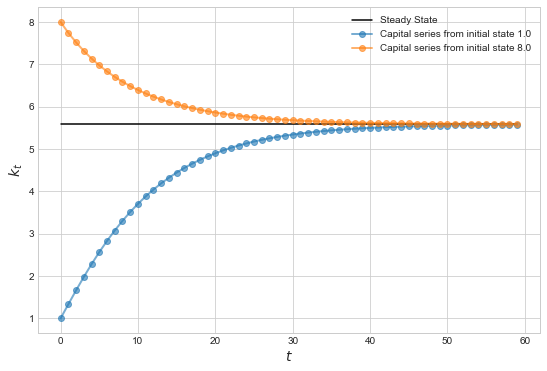

In [ ]:
# create two objects s1,s2 of class Solow
s1 = Solow() # <-- don't specify k explicitly, because of default argument k=1
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(9, 6)) # <-- plt.subplots returns tuple, hence the unpacking of tuple

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='Steady State') # <-- note the flexible arguments: one *arg and two **kwargs 

# Plot time series for each economy
for s in s1, s2:
    lb = f'Capital series from initial state {s.k}' # f-string format
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

## Special Methods

Python provides special methods that come in handy.

For example, recall that lists and tuples have a notion of length and that this length can be queried via the `len` function

In [26]:
x = (10, 20)
len(x)

2

If you want to provide a return value for the `len` function when applied to your user-defined object, use the `__len__` special method

In [27]:
class Foo:
    
    def __len__(self):
        return 42

Now we get

In [28]:
f = Foo()
len(f)

42

A special method we will use regularly is the `__call__` method.

This method can be used to make your instances callable, just like function

In [29]:
class Foo:

    def __call__(self, x):
        return x + 42

After running we get

In [30]:
f = Foo()
f(8)  # Exactly equivalent to f.__call__(8)

50

Methods actually live inside a class object formed when the interpreter reads the class definition

In [57]:
print(Consumer.__dict__)  # Show __dict__ attribute of class object

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x7fee75f5f5e0>, 'earn': <function Consumer.earn at 0x7fee75f5f820>, 'spend': <function Consumer.spend at 0x7fee75f5f8b0>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


Note how the three methods `__init__`, `earn` and `spend` are stored in the class object.

In [139]:
python_list_of_lists = [[3,2,5],[9,7,1],[4,3,6]]
ar = np.array(python_list_of_lists)
ar.shape

(3, 3)

# Example - The consumer problem
$$
\begin{aligned}
V(p_{1},p_{2},m) & = \max_{x_{1},x_{2}} \left(\alpha^{\frac{1}{\sigma}}x_{1}^{\frac{\sigma-1}{\sigma}}+(1-\alpha)^{\frac{1}{\sigma}}x_{2}^{\frac{\sigma-1}{\sigma}}\right)^{\frac{\sigma}{\sigma-1}}\\
 \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq m,\,\,\,p_{1},p_{2},m>0\\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Goal:** Create a model-class to solve this problem.

1. Let `model` be a class
1. Let `model.par` contain all parameters (e.g. `model.par.alpha`)
1. Let `model.sol` contain the solution (e.g. `model.sol.x1`)

**SimpleNamespace():** Like a dictionary, but e.g. `par.alpha` instead of `par['alpha']`.  

In [32]:
# create parameters
par = SimpleNamespace() # create a sort of dictionary to store parameters

# assign parametervalues
par.alpha = 0.5
par.sigma = 0.1

print(f'alpha = {par.alpha:6.3f}') #6.3 refers to format specificaiton
print(f'sigma = {par.sigma:6.3f}')

alpha =  0.500
sigma =  0.100


Can always be interfaced as a dictionary with `__dict__`:

In [33]:
for k,v in par.__dict__.items():
    print(f'{k:5s} = {v:6.3f}')

alpha =  0.500
sigma =  0.100


**Utility function:**

In [34]:
def u_func(model,x1,x2):
    
    par = model.par # contain all parameters
    
    u_x1 = par.alpha**(1/par.sigma)*x1**((par.sigma-1)/par.sigma)
    u_x2 = (1-par.alpha)**(1/par.sigma)*x2**((par.sigma-1)/par.sigma)
    
    return (u_x1+u_x2)**(par.sigma/(par.sigma-1))

**Solution function:**

In [35]:
def solve(model):
    
    par = model.par # contain all parameters
    sol = model.sol # contain the solution
     
    # a. objective function (to minimize)
    obj = lambda x: -model.u_func(x[0],x[1]) # minimize --> negative of utility
    
    # b. constraints and bounds
    budget_constraint = lambda x: par.m-par.p1*x[0]-par.p2*x[1] #Income minus expenditure of good 1 and 2 ,violated if negative
    constraints = ({'type': 'ineq', 'fun': budget_constraint}) # the budgetconstraint we define as an equality constraint
    bounds = ((1e-8,par.m/par.p1-1e-8),(1e-8,par.m/par.p2-1e-8)) # bounds are: spent all on one good or the other + ensuring x1,x2>0
    
    # why all these 1e-8? To avoid ever having x1 = 0 or x2 = 0
    
    # c. call solver - using general solution for Cobb-Douglas
    x0 = [(par.m/par.p1)/2,(par.m/par.p2)/2]
    result = optimize.minimize(obj,x0,method='SLSQP',bounds=bounds,constraints=constraints)
    
    # d.save
    sol.x1 = result.x[0]
    sol.x2 = result.x[1]
    sol.u = model.u_func(sol.x1,sol.x2)

**Create consumer class:**

In [36]:
class ConsumerClass:
    
    def __init__(self): 
        
        # this is called automatically when a consumer is created
        
        # a. parameters
        par = self.par = SimpleNamespace()
        par.alpha = 0.5
        par.sigma = 0.1
        par.mu = 0.5
        par.p1 = 1
        par.p2 = 2
        par.m = 10

        # b. solution
        sol = self.sol = SimpleNamespace()
        sol.x1 = np.nan # empty
        sol.x2 = np.nan
        sol.u = np.nan
        
    u_func = u_func
    solve = solve

**Solve consumer problem**:

In [37]:
hc = ConsumerClass() # calls __init__()
hc.solve()
print(f'(x1,x2) = ({hc.sol.x1:.3f},{hc.sol.x2:.3f}), u = {hc.sol.u:.3f}')

(x1,x2) = (3.489,3.256), u = 6.705


Easy to loop over different alpha values (we expect higher demand for good 1 as alpha increases!:

In [38]:
for alpha in np.linspace(0.3,0.7,5):
    hc.par.alpha = alpha
    hc.solve()
    print(f'alpha = {alpha:.3f} -> (x1,x2) = ({hc.sol.x1:.3f},{hc.sol.x2:.3f}), u = {hc.sol.u:.3f}')

alpha = 0.300 -> (x1,x2) = (1.868,4.066), u = 5.906
alpha = 0.400 -> (x1,x2) = (2.632,3.684), u = 6.282
alpha = 0.500 -> (x1,x2) = (3.489,3.256), u = 6.705
alpha = 0.600 -> (x1,x2) = (4.456,2.772), u = 7.186
alpha = 0.700 -> (x1,x2) = (5.556,2.222), u = 7.737
